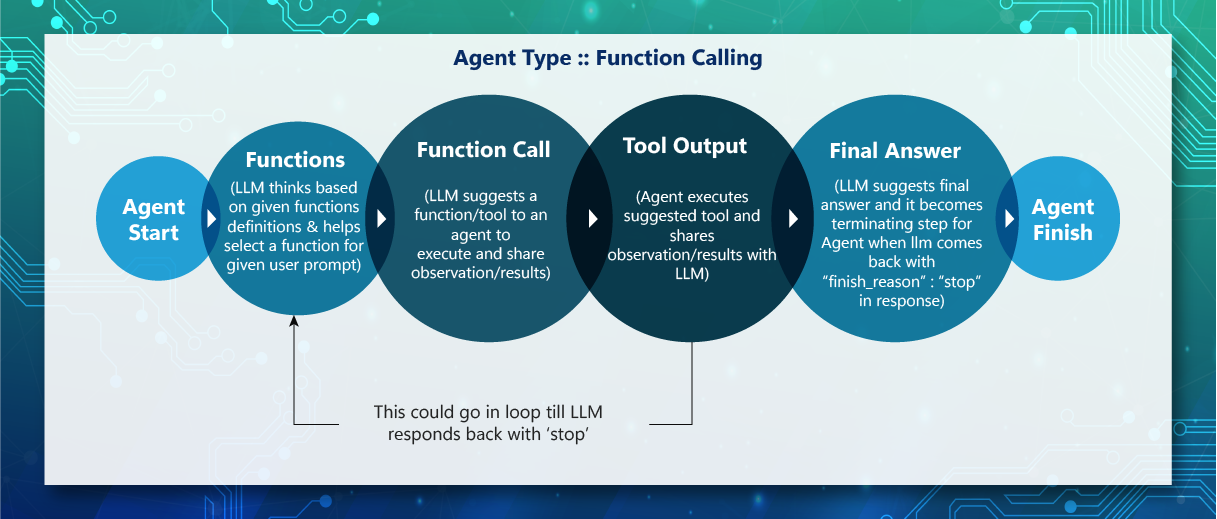

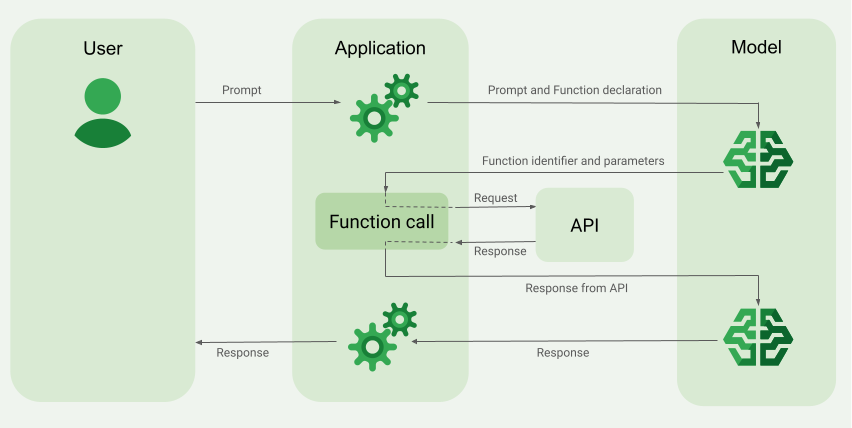

In [1]:
import os
from dotenv import load_dotenv
load_dotenv()
GOOGLE_API_KEY=os.getenv("GEMINI_API_KEY")
TAVILY_API_KEY=os.getenv("TAVILY_API_KEY")
GROQ_API_KEY=os.getenv("GROQ_API_KEY")
LANGCHAIN_API_KEY=os.getenv("LANGCHAIN_API_KEY")
os.environ["GOOGLE_API_KEY"] = GOOGLE_API_KEY
os.environ["TAVILY_API_KEY"] = TAVILY_API_KEY
os.environ["GROQ_API_KEY"]= GROQ_API_KEY
os.environ["LANGCHAIN_API_KEY"] = LANGCHAIN_API_KEY
os.environ["LANGCHAIN_TRACING_V2"] = "true"


In [3]:
from langchain_google_genai import GoogleGenerativeAIEmbeddings
embeddings = GoogleGenerativeAIEmbeddings(model="models/embedding-001")
from langchain_google_genai import ChatGoogleGenerativeAI
llm = ChatGoogleGenerativeAI(model="gemini-1.5-pro")

In [8]:
from langchain_groq import ChatGroq
# llm=ChatGroq(model_name="")
# llm.invoke("hi")

In [5]:

message=[{"role":"system","content":"you are a helpful assistant"},
         {"role":"user","content":"hi how are you?"}]

result = llm.invoke(message)
print(result.content)

I'm doing well, thank you for asking! How can I help you today?


In [6]:
import re
import httpx

In [7]:
from typing import Any

In [9]:
class ChatBot:
    def __init__(self,system=""):
        self.system=system
        self.message=[]
        if self.system:
            self.message.append({"role":"system","content":system})
    def __call__(self,message): # 
        '''This is a special method in Python classes known as the __call__ method. It allows an instance of the class to 
        be called as a function.'''
        self.message.append({"role":"user","content":message})
        result=self.execute()
        self.message.append({"role":"assistant","content":result})
        return result
        
    def execute(self):
        llm = ChatGroq(model_name="Gemma2-9b-It")
        result = llm.invoke(self.message)
        return result.content

In [ ]:

# Here are the special methods in Python classes:
# Initialization and Representation
# __init__: Initializes the object.
# __repr__: Returns a string representation of the object.
# __str__: Returns a human-readable string representation of the object.
# Arithmetic Operations
# __add__: Implements the + operator.
# __sub__: Implements the - operator.
# __mul__: Implements the * operator.
# __truediv__: Implements the / operator.
# __floordiv__: Implements the // operator.
# __mod__: Implements the % operator.
# __pow__: Implements the ** operator.
# Comparison Operations
# __eq__: Implements the == operator.
# __ne__: Implements the != operator.
# __lt__: Implements the < operator.
# __le__: Implements the <= operator.
# __gt__: Implements the > operator.
# __ge__: Implements the >= operator.
# Container Operations
# __len__: Returns the length of the object.
# __getitem__: Implements indexing (obj[key]).
# __setitem__: Implements assignment to indexed elements (obj[key] = value).
# __delitem__: Implements deletion of indexed elements (del obj[key]).
# __iter__: Returns an iterator over the object.
# __reversed__: Returns a reverse iterator over the object.
# __contains__: Implements the in operator.
# Attribute Access
# __getattr__: Implements attribute access (obj.attr).
# __setattr__: Implements attribute assignment (obj.attr = value).
# __delattr__: Implements attribute deletion (del obj.attr).
# Callable Objects
# __call__: Makes the object callable.
# Context Manager
# __enter__: Implements the with statement.
# __exit__: Implements the with statement.
# Descriptors
# __get__: Implements attribute access for descriptors.
# __set__: Implements attribute assignment for descriptors.
# __delete__: Implements attribute deletion for descriptors.
# Other Special Methods
# __hash__: Returns the hash value of the object.
# __format__: Formats the object as a string.
# __bool__: Returns the boolean value of the object.
# # These special methods can be used to customize the behavior of your objects and make them more Pythonic.

In [10]:
assistant=ChatBot(system="you are a helpful assistant")

In [11]:
assistant("hi how are you?")

"As an AI, I don't have feelings, but I'm here and ready to assist you! How can I help you today? 😊  \n\n"

In [12]:
assistant("can you tell me how i can achieve my fitness goal?")

'I can definitely help you brainstorm how to achieve your fitness goals! \n\nTo give you the best advice, I need a little more information.  Tell me:\n\n1. **What is your specific fitness goal?** \n    * Do you want to lose weight, gain muscle, improve endurance, train for a specific event, or something else?\n2. **What is your current fitness level?** \n    * Are you a beginner, intermediate, or advanced?\n3. **How much time can you commit to working out each week?**\n4. **What type of activities do you enjoy?** \n    * Do you like cardio, strength training, yoga, team sports, or something else?\n5. **Do you have any limitations or injuries I should be aware of?**\n\nOnce I have this information, I can provide you with personalized tips and resources to help you reach your goals! 💪  🎉\n'

In [13]:
assistant.message

[{'role': 'system', 'content': 'you are a helpful assistant'},
 {'role': 'user', 'content': 'hi how are you?'},
 {'role': 'assistant',
  'content': "As an AI, I don't have feelings, but I'm here and ready to assist you! How can I help you today? 😊  \n\n"},
 {'role': 'user',
  'content': 'can you tell me how i can achieve my fitness goal?'},
 {'role': 'assistant',
  'content': 'I can definitely help you brainstorm how to achieve your fitness goals! \n\nTo give you the best advice, I need a little more information.  Tell me:\n\n1. **What is your specific fitness goal?** \n    * Do you want to lose weight, gain muscle, improve endurance, train for a specific event, or something else?\n2. **What is your current fitness level?** \n    * Are you a beginner, intermediate, or advanced?\n3. **How much time can you commit to working out each week?**\n4. **What type of activities do you enjoy?** \n    * Do you like cardio, strength training, yoga, team sports, or something else?\n5. **Do you have

In [14]:
prompt = """
You run in a loop of Thought, Action, PAUSE, Observation.
At the end of the loop you output an Answer.
Use Thought to describe your thoughts about the question you have been asked.
Use Action to run one of the actions available to you - then return PAUSE.
Observation will be the result of running those actions.

Your available actions are:

calculate:  e.g. calculate: 4 * 7 / 3
Runs a calculation and returns the number - uses Python so be sure to use floating point
syntax if necessary

wikipedia: e.g. wikipedia: Django
Returns a summary from searching Wikipedia

simon_blog_search: e.g. simon_blog_search: Django
Search Simon's blog for that term

Example session:

Question: What is the capital of France?
Thought: I should look up France on Wikipedia
Action: wikipedia: France
PAUSE

You will be called again with this:
Observation: France is a country. The capital is Paris.

You then output:
Answer: The capital of France is Paris
""".strip()

In [15]:
prompt

"You run in a loop of Thought, Action, PAUSE, Observation.\nAt the end of the loop you output an Answer.\nUse Thought to describe your thoughts about the question you have been asked.\nUse Action to run one of the actions available to you - then return PAUSE.\nObservation will be the result of running those actions.\n\nYour available actions are:\ncalculate:\ne.g. calculate: 4 * 7 / 3\nRuns a calculation and returns the number - uses Python so be sure to use floating point\nsyntax if necessary\n\nwikipedia:\ne.g. wikipedia: Django\nReturns a summary from searching Wikipedia\n\nsimon_blog_search:\ne.g. simon_blog_search: Django\nSearch Simon's blog for that term\n\nExample session:\nQuestion: What is the capital of France?\nThought: I should look up France on Wikipedia\nAction: wikipedia: France\nPAUSE\n\nYou will be called again with this:\nObservation: France is a country. The capital is Paris.\n\nYou then output:\nAnswer: The capital of France is Paris"

In [16]:
action_re = re.compile('^Action: (\w+): (.*)')

In [ ]:
# ^ asserts the start of a line.
# Action: matches the literal string "Action:".
# (\w+) captures one or more word characters (equivalent to [a-zA-Z0-9_]) into group 1. This will match the action type.
# : matches a literal colon.
# (.*) captures any characters (including none) into group 2. This will match the action description.

In [18]:
import re

action_re = re.compile('^Action: (\w+): (.*)')

# Example string
action_string = "Action: Jump: Perform a jumping action"

# Match the string
match = action_re.match(action_string)

if match:
    # Extract the action type and description
    action_type = match.group(1)
    action_description = match.group(2)

    print(f"Action Type: {action_type}")
    print(f"Action Description: {action_description}")
else:
    print("No match found")

Action Type: Jump
Action Description: Perform a jumping action


In [17]:
action_re

re.compile(r'^Action: (\w+): (.*)', re.UNICODE)

In [19]:
def wikipedia(q):
    response = httpx.get("https://en.wikipedia.org/w/api.php", params={
        "action": "query",
        "list": "search",
        "srsearch": q,
        "format": "json"
    })
    return response.json()["query"]["search"][0]["snippet"]

In [ ]:

# This is a Python function named wikipedia that takes a query string q as input and returns a short snippet from the top Wikipedia search result.
# Here's a breakdown of the function:
# The function sends a GET request to the Wikipedia API using the httpx library.
# The request includes several parameters:
# action: Specifies the action to perform, which is "query" in this case.
# list: Specifies the list of results to retrieve, which is "search" in this case.
# srsearch: Specifies the search query, which is the input parameter q.
# format: Specifies the format of the response, which is "json" in this case.
# The function parses the JSON response from the API using the response.json() method.
# It then extracts the snippet from the top search result using the following keys:
# "query": Accesses the query results.
# "search": Accesses the search results.
# [0]: Accesses the first (top) search result.
# "snippet": Accesses the snippet of the search result.

In [22]:
def simon_blog_search(q):
    response = httpx.get("https://datasette.simonwillison.net/simonwillisonblog.json", params={
        "sql": """
        select
          blog_entry.title || ': ' || substr(html_strip_tags(blog_entry.body), 0, 1000) as text,
          blog_entry.created
        from
          blog_entry join blog_entry_fts on blog_entry.rowid = blog_entry_fts.rowid
        where
          blog_entry_fts match escape_fts(:q)
        order by
          blog_entry_fts.rank
        limit
          1
        """.strip(),
        "_shape": "array",
        "q": q,
    })
    return response.json()[0]["text"]

In [ ]:
# The function sends a GET request to a Datasette instance using the httpx library.
# The request includes several parameters:
# sql: A SQL query that searches the blog entries.
# _shape: Specifies the response shape, which is "array" in this case.
# q: The search query, which is the input parameter q.
# The SQL query does the following:
# Joins the blog_entry table with the blog_entry_fts table on the rowid column.
# Searches the blog_entry_fts table for rows that match the search query using the match operator.
# Orders the results by the rank column.
# Limits the results to the top 1 row.
# Returns a concatenated string of the title and body columns, truncated to 1000 characters.
# The function parses the JSON response from the Datasette instance using the response.json() method.
# It then extracts the text snippet from the top search result using the following keys:
# [0]: Accesses the first (top) search result.
# "text": Accesses the text snippet of the search result.

In [20]:
def calculate(what):
    return eval(what)

In [ ]:
# he eval() function in Python evaluates a string as a Python expression and returns the result.
# Syntax:
# eval(expression, globals=None, locals=None)
# Parameters:
# expression: The string to be evaluated as a Python expression.
# globals: A dictionary of global variables. Defaults to the current global symbol table.
# locals: A dictionary of local variables. Defaults to the current local symbol table.

In [ ]:
known_actions = { # which are present inside the prompt
    "wikipedia": wikipedia,
    "calculate": calculate,
    "simon_blog_search": simon_blog_search
}

In [24]:
def query(question, max_turns=7):
    i = 0
    bot = ChatBot(prompt)
    next_prompt = question
    while i < max_turns:
        i += 1
        result = bot(next_prompt)
        print(result)
        
        actions = [action_re.match(a) for a in result.split('\n') if action_re.match(a)]
        if actions:
            action, action_input = actions[0].groups()
            if action not in known_actions:
                raise Exception(f"Unknown action: {action}: {action_input}")
            print(" -- running {} {}".format(action, action_input))
            observation = known_actions[action](action_input)
            print("Observation:", observation)
            next_prompt = f"Observation: {observation}"
        else:
            return result

In [ ]:
# Action Extraction:
# The code splits the chatbot's response (result) into individual lines using result.split('\n').
# It then uses a list comprehension to find lines that match the action_re regular expression pattern.
# The action_re.match(a) condition filters out lines that don't match the pattern.
# The resulting matches are stored in the actions list.
# Action Handling:
# If the actions list is not empty, the code extracts the first action and its input using actions[0].groups().
# It checks if the action is in the known_actions dictionary. If not, it raises an exception.
# If the action is known, it prints a message indicating that it's running the action.
# The code then calls the corresponding function from the known_actions dictionary, passing the action input as an argument.
# The result of the action is stored in the observation variable and printed.
# Finally, the code updates the next_prompt variable with the observation, which will be used as the input for the next chatbot response.

In [25]:
question = "What is the capital of France?"
result = query(question)
print(result)

Thought: I wonder if Simon has written about the capital of France on his blog. 

Action: simon_blog_search: Paris
PAUSE 

 -- running simon_blog_search Paris
Observation: A guide to the guides to Paris: My answer to A guide to the guides to Paris on Ask MetaFilter
You can't go wrong with Atlas Obscura. I haven't used it in Paris (I've used it successfully in many other places though, including Mexico City) but from glancing over their listings it looks like there are some real gems there: http://www.atlasobscura.com/things-to-do/paris-france. I've been to the Catacombs and they are astonishing.
Then at 23:27:
The excellent Citymapper app knows Paris transport very well.
Thought: That's interesting, but I need the capital of France, not travel tips. I should try Wikipedia again. 

Action: wikipedia: Paris
PAUSE 

 -- running wikipedia Paris
Observation: <span class="searchmatch">Paris</span> (French pronunciation: [paʁi] ) is the capital and largest city of France. With an estimated po

In [26]:
print(query("Fifteen * twenty five"))

Thought: I need to calculate 15 times 25.

Action: calculate: 15 * 25 
PAUSE 

 -- running calculate 15 * 25 
Observation: 375
Answer: 375  

Answer: 375  



In [27]:
print(query("what nasa does?"))

Thought: I can answer the second part of the question by searching Simon's blog for "NASA". 

Action: simon_blog_search: NASA
PAUSE 

 -- running simon_blog_search NASA
Observation: Space Shuttle Columbia Accident: My answer to Space Shuttle Columbia Accident on Ask MetaFilter
The official accident report is surprisingly readable - I had to look at it a while back for a university project.
Thought: That's helpful, but I need more general information about what NASA does.

Action: wikipedia: NASA 
PAUSE 

 -- running wikipedia NASA 
Observation: The National Aeronautics and Space Administration (<span class="searchmatch">NASA</span> /ˈnæsə/) is an independent agency of the US federal government responsible for the United States'
Thought:  I have enough information to answer the question now. 

Answer: NASA is an independent agency of the US federal government responsible for the United States' civilian space program. 

Thought:  I have enough information to answer the question now. 

An

In [ ]:
# Understand the Regular expression
# Pattern Breakdown:

# ^: This matches the start of a string. It means the string must begin with what follows.
# Action:: This is a literal match. It means the string must have the text "Action:" at the beginning.
# (\w+):
# The parentheses () define a capture group. This allows you to extract part of the string that matches this section.
# \w+ matches one or more word characters (letters, digits, and underscores). This will capture a word that follows "Action:".
# :: This is a literal colon that separates the word matched by (\w+) from the rest of the string.
# (.*):
# This is another capture group, where .* matches any character (.) zero or more times (*), which means it captures everything that comes after the second colon.
# What does it do?
# This regex is looking for a string that:

# Starts with the text "Action:".
# Has a word right after it, separated by a colon.

REAct agent

In [28]:
# Sample strings
text1 = "Action: Move: North"
text2 = "Action: Jump: High"
text3 = "Error: Not an Action"

In [29]:
# Testing the pattern
match1 = action_re.match(text1)

In [30]:
match1

<re.Match object; span=(0, 19), match='Action: Move: North'>

In [31]:
match1.group(1)

'Move'

In [32]:

match1.group(2)

'North'

In [33]:
# Extracting the matched groups
if match1:
    print(f"Matched: {match1.group(1)}, {match1.group(2)}")

Matched: Move, North


In [34]:
match3 = action_re.match(text3)

In [35]:
if match3:
    print("No match")  # This won't match, as it doesn't start with "Action:"

In [36]:
next_prompt="Tell me about quantum computing from Wikipedia."

In [42]:
prompt

"You run in a loop of Thought, Action, PAUSE, Observation.\nAt the end of the loop you output an Answer.\nUse Thought to describe your thoughts about the question you have been asked.\nUse Action to run one of the actions available to you - then return PAUSE.\nObservation will be the result of running those actions.\n\nYour available actions are:\ncalculate:\ne.g. calculate: 4 * 7 / 3\nRuns a calculation and returns the number - uses Python so be sure to use floating point\nsyntax if necessary\n\nwikipedia:\ne.g. wikipedia: Django\nReturns a summary from searching Wikipedia\n\nsimon_blog_search:\ne.g. simon_blog_search: Django\nSearch Simon's blog for that term\n\nExample session:\nQuestion: What is the capital of France?\nThought: I should look up France on Wikipedia\nAction: wikipedia: France\nPAUSE\n\nYou will be called again with this:\nObservation: France is a country. The capital is Paris.\n\nYou then output:\nAnswer: The capital of France is Paris"

In [37]:
bot = ChatBot(prompt)

In [38]:

result = bot(next_prompt)

In [39]:
result

"Thought: I'll ask Wikipedia for information about quantum computing. \n\nAction: wikipedia: Quantum computing \nPAUSE \n"

In [40]:
actions = [action_re.match(a) for a in result.split('\n') if action_re.match(a)]

In [41]:
actions

[<re.Match object; span=(0, 37), match='Action: wikipedia: Quantum computing '>]

In [43]:
action, action_input = actions[0].groups()

In [44]:
action_input

'Quantum computing '

In [45]:
action

'wikipedia'

In [46]:
known_actions[action]

<function __main__.wikipedia(q)>

In [47]:
known_actions[action](action_input)

'waves, and <span class="searchmatch">quantum</span> <span class="searchmatch">computing</span> leverages this behavior using specialized hardware. Classical physics cannot explain the operation of these <span class="searchmatch">quantum</span> devices'

In [48]:
query("hello")

Understood. I'm ready to begin.  Ask me your question! 



"Understood. I'm ready to begin.  Ask me your question! \n"

In [49]:
query("what you doing?")

Understood. I will follow the Thought, Action, PAUSE, Observation, Answer loop. 

Ask me your question!  




'Understood. I will follow the Thought, Action, PAUSE, Observation, Answer loop. \n\nAsk me your question!  \n\n'

In [50]:
query(next_prompt)

Thought: I will search Wikipedia for information about quantum computing.

Action: wikipedia: Quantum computing 
PAUSE 

 -- running wikipedia Quantum computing 
Observation: waves, and <span class="searchmatch">quantum</span> <span class="searchmatch">computing</span> leverages this behavior using specialized hardware. Classical physics cannot explain the operation of these <span class="searchmatch">quantum</span> devices
Answer: Quantum computing uses the principles of quantum mechanics, particularly the behavior of waves, to perform calculations. 



'Answer: Quantum computing uses the principles of quantum mechanics, particularly the behavior of waves, to perform calculations. \n'